<a href="https://colab.research.google.com/github/DiegoRomanCortes/AED/blob/master/PilaArena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

Este notebook tiene por objetivo modelar de manera simplificada el derrumbe de una torre de arena. Para ello, se utiliza una matriz que simula los espacios que usaría cada montón de granitos, poniendo la pila inicial en el centro de la misma. La regla es que si la pila tiene 4 o más granitos, éstos sean traspazados de forma equitativa a las posiciones cardinales adyacentes.

#Parte 1

Primero se importan las librerías para manejar arreglos y para graficar.

In [0]:
from matplotlib import pyplot as plt
import numpy as np

Luego se le pide la cantidad inicial de arena al usuario.

In [0]:
#N = input("Inserte número de granitos de arena a apilar: ")
N = 4235

El número $N$ ingresado se convirtirá a `int`, pues originalmente era un `String`. La matriz deberá ser de $\sqrt{N}$ x $\sqrt{N}$ idealmente para que el número total de elementos en la matriz sea precisamente $N$ (el peor escenario es que los granitos se repartan por todo el espacio). Como $\sqrt{N}$ no retorna necesariamente enteros y éstos son necearios para crear la matriz, se borra su posible parte decimal casteándolo como entero. 

In [0]:
N = int(N)
L = np.sqrt(N)
L = int(L)

Naturalmente, es conveniente inicializar una matriz de ceros $M$ con la forma que se vió anteriormente. La posición mediana está en $M_{\frac{N}{2},\frac{N}{2}}$, por lo que allí será asignado el valor $N$ ingresado.

In [0]:
mat = np.zeros((L,L))
mat[L//2][L//2] = N

El algoritmo más fácil de programar es el de fuerza bruta. Éste recorre la matriz $N$ veces, haciendo la repartición equitativa cada vez que se detecte algún valor $M_{i,j} >= 4$. También se contará las veces que se aplica la regla de derrumbe.

In [0]:
ciclo_1 = 0 
for n in range(N):
  for i in range(len(mat)):
    for j in range(len(mat[0])):
      if mat[i][j] >= 4:
        ciclo_1 += 1
        mat[i][j] -= 4
        mat[i-1][j] += 1
        mat[i+1][j] += 1
        mat[i][j-1] += 1
        mat[i][j+1] += 1

Número de veces que se aplicó la regla:  330343


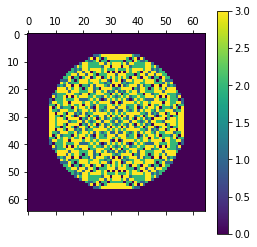

In [6]:
print("Número de veces que se aplicó la regla: ", ciclo_1)
plt.matshow(mat)
plt.colorbar()
plt.show()

#Parte 2
Notemos que el algoritmo anterior admite una pequeña optimización, pues reparte los granos de arena de a 4 unidades. Se implementará por tanto una porción de código que reparta todo lo que se pueda (mayor múltiplo de 4) a sus vecinos cardinales. 

In [0]:
mat = np.zeros((L,L))
mat[L//2][L//2] = N

Nuevamente, se guarda la cantidad de veces en las que se aplica la regla. 

In [0]:
ciclo_2 = 0
for n in range(N):
  for i in range(len(mat)):
    for j in range(len(mat[0])):
      if mat[i][j] >= 4:
        ciclo_2 += 1
        granitos = mat[i][j] - mat[i][j] % 4 #notar que si granitos == 4 recuperamos programa anterior
        mat[i][j] -= granitos
        mat[i-1][j] += granitos / 4
        mat[i+1][j] += granitos / 4
        mat[i][j-1] += granitos / 4
        mat[i][j+1] += granitos / 4

Número de veces que se aplicó la regla:  216147


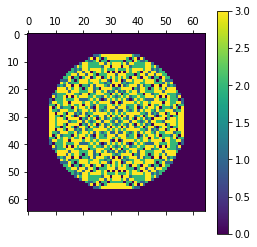

In [9]:
print("Número de veces que se aplicó la regla: ", ciclo_2)
plt.matshow(mat)
plt.colorbar()
plt.show()

#Parte 3
Se ejecutarán ahora ambos algoritmos para distintos valores de $N$. El gráfico resultante permitirá comparar ambos métodos.

In [0]:
def alg_1(N, mat):
  ciclo_1 = 0 
  for n in range(N):
    for i in range(len(mat)):
      for j in range(len(mat[0])):
        if mat[i][j] >= 4:
          ciclo_1 += 1
          mat[i][j] -= 4
          mat[i-1][j] += 1
          mat[i+1][j] += 1
          mat[i][j-1] += 1
          mat[i][j+1] += 1
  return(mat, ciclo_1)

def alg_2(N, mat):
  ciclo_2 = 0
  for n in range(N):
    for i in range(len(mat)):
      for j in range(len(mat[0])):
        if mat[i][j] >= 4:
          ciclo_2 += 1
          granitos = mat[i][j] - mat[i][j] % 4 #notar que si granitos == 4 recuperamos programa anterior
          mat[i][j] -= granitos
          mat[i-1][j] += granitos / 4
          mat[i+1][j] += granitos / 4
          mat[i][j-1] += granitos / 4
          mat[i][j+1] += granitos / 4
  return(mat, ciclo_2)

def corre(alg, N):
  N = int(N) #A = pi r**2 => 2*r = 2*sqrt(A/pi)
  L = np.sqrt(N/1.5)
  L = np.sqrt(N)
  L = int(L)
  mat = np.zeros((L,L))
  mat[L//2][L//2] = N
  res = alg(N, mat)
  return res

In [0]:
enes = np.linspace(120,1000)
res_1 = np.zeros(len(enes)) 
res_2 = np.zeros(len(enes))

i = 0
while i < len(enes):
  res_1[i] = corre(alg_1, enes[i])[1]
  res_2[i] = corre(alg_2, enes[i])[1]
  i += 1

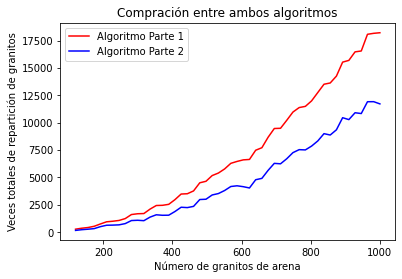

In [12]:
plt.plot(enes, res_1, 'r', label = "Algoritmo Parte 1")
plt.plot(enes, res_2, 'b', label = 'Algoritmo Parte 2')

plt.title("Compración entre ambos algoritmos")
plt.xlabel("Número de granitos de arena")
plt.ylabel("Veces totales de repartición de granitos")
plt.legend()
plt.show()

![texto alternativo](https://github.com/DiegoRomanCortes/AED/blob/master/hasta%205000.png?raw=true)